In [13]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv('data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabin column is dropped because of too many missing values
Name and Ticket dropped because it is unique at each column

In [19]:
df2 = df.drop(columns=['Name','Ticket','Cabin'])

Dropped 2 rows where embarked is null

In [20]:
df2.dropna(inplace=True, subset=['Embarked'])

In [21]:
data = df2.values
X = data[:, 2:]
print(X)

[[3 'male' 22.0 ... 0 7.25 'S']
 [1 'female' 38.0 ... 0 71.2833 'C']
 [3 'female' 26.0 ... 0 7.925 'S']
 ...
 [3 'female' nan ... 2 23.45 'S']
 [1 'male' 26.0 ... 0 30.0 'C']
 [3 'male' 32.0 ... 0 7.75 'Q']]


In [22]:
y = data[:,1]
print(y)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1
 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0
 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0
 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1
 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1
 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0
 0 1 1 0 1 0 0 1 0 0 0 0 

In [23]:
from sklearn.model_selection import train_test_split

Splitting the array into test and train sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(711, 7)
(178, 7)
(711,)
(178,)


In [26]:
print(X_train)

[[3 'male' nan ... 0 8.05 'S']
 [3 'male' 19.0 ... 0 10.1708 'S']
 [3 'male' nan ... 0 7.75 'Q']
 ...
 [3 'male' 26.0 ... 0 14.4542 'C']
 [2 'male' 44.0 ... 0 26.0 'S']
 [3 'male' 21.0 ... 0 8.05 'S']]


In [27]:
from sklearn.impute import SimpleImputer

Imputer to fill null values using mode

In [28]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

Replacing null values in age with mode

In [29]:
imputer.fit(X_train[:, 2:3])

SimpleImputer(strategy='most_frequent')

In [30]:
X_train[:, 2:3] = imputer.transform(X_train[:, 2:3])
print(X_train)

[[3 'male' 24.0 ... 0 8.05 'S']
 [3 'male' 19.0 ... 0 10.1708 'S']
 [3 'male' 24.0 ... 0 7.75 'Q']
 ...
 [3 'male' 26.0 ... 0 14.4542 'C']
 [2 'male' 44.0 ... 0 26.0 'S']
 [3 'male' 21.0 ... 0 8.05 'S']]


In [31]:
X_test[:, 2:3] = imputer.transform(X_test[:, 2:3])
print(X_test)

[[2 'female' 36.0 ... 0 13.0 'S']
 [2 'female' 50.0 ... 1 26.0 'S']
 [3 'male' 48.0 ... 0 7.8542 'S']
 ...
 [1 'male' 22.0 ... 0 135.6333 'C']
 [3 'male' 22.0 ... 0 8.05 'S']
 [2 'male' 24.0 ... 0 10.5 'S']]


Min Max Feature Scaling on columns Age and Fare

In [32]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0,1))

In [33]:
X_train[:,(2,5)] = min_max_scaler.fit_transform(X_train[:,(2,5)])
X_test[:,(2,5)] = min_max_scaler.transform(X_test[:,(2,5)])

In [34]:
print(X_train)

[[3 'male' 0.2963056044232219 ... 0 0.03060836501901141 'S']
 [3 'male' 0.2334757476752953 ... 0 0.038672243346007606 'S']
 [3 'male' 0.2963056044232219 ... 0 0.029467680608365018 'Q']
 ...
 [3 'male' 0.32143754712239253 ... 0 0.05495893536121673 'C']
 [2 'male' 0.5476250314149284 ... 0 0.09885931558935361 'S']
 [3 'male' 0.2586076903744659 ... 0 0.03060836501901141 'S']]


In [35]:
print(X_test)

[[2 'female' 0.4470972606182458 ... 0 0.049429657794676805 'S']
 [2 'female' 0.6230208595124404 ... 1 0.09885931558935361 'S']
 [3 'male' 0.5978889168132697 ... 0 0.029863878326996197 'S']
 ...
 [1 'male' 0.2711736617240512 ... 0 0.515715969581749 'C']
 [3 'male' 0.2711736617240512 ... 0 0.03060836501901141 'S']
 [2 'male' 0.2963056044232219 ... 0 0.039923954372623575 'S']]


In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

Encoding Sex and Embarked columns using OneHotEncoder

In [37]:
ct = ColumnTransformer(transformers=[('encode', OneHotEncoder(),[1,-1])], remainder='passthrough')


In [38]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [39]:
print(X_train)

[[0.0 1.0 0.0 ... 0 0 0.03060836501901141]
 [0.0 1.0 0.0 ... 0 0 0.038672243346007606]
 [0.0 1.0 0.0 ... 0 0 0.029467680608365018]
 ...
 [0.0 1.0 1.0 ... 1 0 0.05495893536121673]
 [0.0 1.0 0.0 ... 1 0 0.09885931558935361]
 [0.0 1.0 0.0 ... 0 0 0.03060836501901141]]


In [40]:
print(X_test)

[[1.0 0.0 0.0 ... 0 0 0.049429657794676805]
 [1.0 0.0 0.0 ... 0 1 0.09885931558935361]
 [0.0 1.0 0.0 ... 0 0 0.029863878326996197]
 ...
 [0.0 1.0 1.0 ... 0 0 0.515715969581749]
 [0.0 1.0 0.0 ... 0 0 0.03060836501901141]
 [0.0 1.0 0.0 ... 0 0 0.039923954372623575]]


In [41]:
df_train = pd.DataFrame(X_train)
df_train

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,1.0,3,0.296306,0,0,0.030608
1,0.0,1.0,0.0,0.0,1.0,3,0.233476,0,0,0.038672
2,0.0,1.0,0.0,1.0,0.0,3,0.296306,0,0,0.029468
3,0.0,1.0,0.0,0.0,1.0,3,0.296306,0,0,0.030608
4,0.0,1.0,1.0,0.0,0.0,1,0.723549,0,2,0.430703
...,...,...,...,...,...,...,...,...,...,...
706,1.0,0.0,1.0,0.0,0.0,1,0.472229,0,0,0.865114
707,0.0,1.0,0.0,1.0,0.0,3,0.296306,1,0,0.091825
708,0.0,1.0,1.0,0.0,0.0,3,0.321438,1,0,0.054959
709,0.0,1.0,0.0,0.0,1.0,2,0.547625,1,0,0.098859


In [42]:
df_test = pd.DataFrame(X_test)
df_test

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,1.0,2,0.447097,0,0,0.04943
1,1.0,0.0,0.0,0.0,1.0,2,0.623021,0,1,0.098859
2,0.0,1.0,0.0,0.0,1.0,3,0.597889,0,0,0.029864
3,1.0,0.0,0.0,1.0,0.0,3,0.195778,0,0,0.029468
4,0.0,1.0,0.0,0.0,1.0,3,0.170646,5,2,0.178327
...,...,...,...,...,...,...,...,...,...,...
173,0.0,1.0,0.0,0.0,1.0,3,0.296306,0,0,0.029642
174,0.0,1.0,1.0,0.0,0.0,3,0.132948,0,0,0.071435
175,0.0,1.0,1.0,0.0,0.0,1,0.271174,0,0,0.515716
176,0.0,1.0,0.0,0.0,1.0,3,0.271174,0,0,0.030608


In [43]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn import metrics

In [44]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [45]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression()

In [46]:
log_pred = logr.predict(X_test)
log_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0])

In [47]:
confusion_matrix = metrics.confusion_matrix(y_test, log_pred)
confusion_matrix

array([[90, 15],
       [15, 58]])

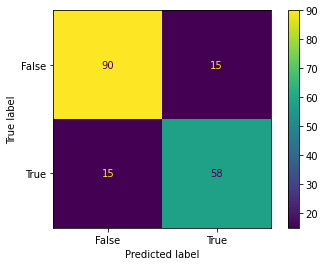

In [48]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
cm_display.plot()
plt.show()

In [49]:
accuracy = metrics.accuracy_score(y_test, log_pred)
accuracy

0.8314606741573034

In [50]:
precision = metrics.precision_score(y_test, log_pred)
precision

0.7945205479452054